In [51]:
# 1
from random import sample, choices
from math import comb

urna = ['rosie'] * 10 + ['neagra'] * 5 + ['alba'] * 5

# A: bilele au aceeasi culoare
# P(A) astimat si teoretic
# toate bilele au aceeasi culoare => 'toate rosii' sau 'toate negre' sau 'toate albe'
# P. teoretic: caz. pos: Comb(20, 4)
#              caz. fav: Comb(10,4) + Comb(5, 4) * 2
def probabilitate_estimata_A():
    n = 100000
    succeseA = 0
    for _ in range(n):
        extragere = sample(urna, 3)
        if len(extragere) == extragere.count(extragere[0]):
            succeseA += 1
    return succeseA / n
probabilitate_teoretca_A = (comb(10,3) + 2*comb(5,3))/comb(20,3)

print('P(A)')
print(probabilitate_estimata_A())
print(probabilitate_teoretca_A)

# B: cele 3 bile sunt de culori distincte
def probabilitate_estimata_B():
    n = 100000
    succeseB = 0
    for _ in range(n):
        extragere = sample(urna, 3)
        suntDistincte = True
        for i in range(len(extragere)):
            if extragere.count(extragere[i]) > 1:
                suntDistincte = False
                break
        if suntDistincte:
            succeseB += 1
    return succeseB / n
probabilitate_teoretica_B = (10*5*5)/comb(20,3)

print('P(B)')
print(probabilitate_estimata_B())
print(probabilitate_teoretica_B)

# C: cel putin o bila este neagra
# P(A|C) => daca cel putin o bila este neagra care e probabilitatea ca toate bilele sa aiba aceeasi culoarea => P('toate negre')

def probabilitate_estimata_A_relativ_C():
    n = 100000
    succese = 0
    for i in range(n):
        extragere = sample(urna, 3)
        if extragere.count('neagra') >= 1:
            if extragere.count(extragere[0]) == len(extragere):
                succese += 1
    return succese / n
probabilitate_teoretca_A_relativ_C = comb(5,3)/comb(20,3)

print('P(A|C)')
print(probabilitate_estimata_A_relativ_C())
print(probabilitate_teoretca_A_relativ_C)

# P(C)
def probabilitate_estimata_C():
    n = 100000
    succeseC = 0
    for i in range(n):
        extragere = sample(urna, 3)
        if extragere.count('neagra') >= 1:
            succeseC += 1
    return succeseC / n

caz_fav_una_neagra = 5 * comb(15,2)
caz_fav_doua_negre = comb(5,2) * 15
caz_fav_trei_negre = comb(5,3)
probabilitate_teoretca_C = (caz_fav_una_neagra + caz_fav_doua_negre + caz_fav_trei_negre) / comb(20,3)

print('P(C)')
print(probabilitate_estimata_C())
print(probabilitate_teoretca_C)

P(A)
0.1233
0.12280701754385964
P(B)
0.21735
0.21929824561403508
P(A|C)
0.00897
0.008771929824561403
P(C)
0.59967
0.6008771929824561


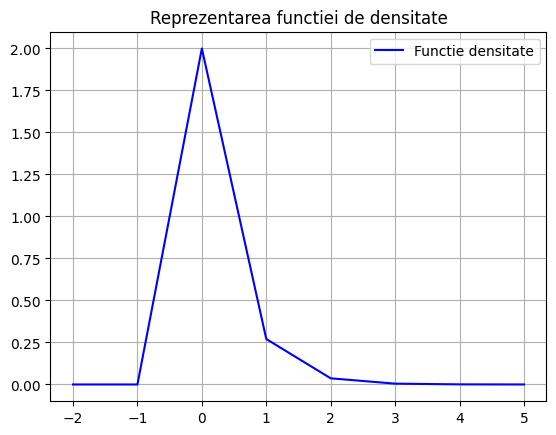

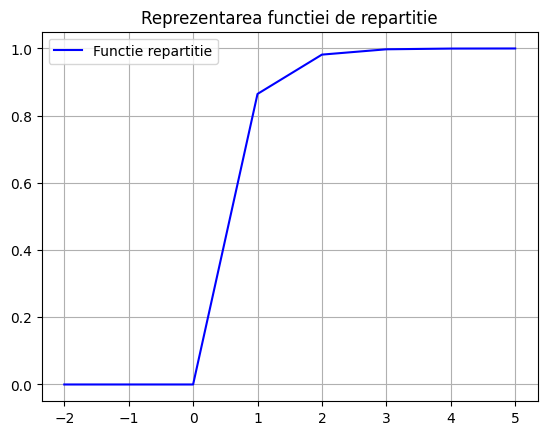

In [30]:
# 2
# functia de densitate => pdf
# functia de repartitie => cdf (deoarece se repartizeaza o valoarea pe un anumit interval)
from scipy.stats import expon
from matplotlib.pyplot import grid, show, plot, xticks, title, legend

rate = 2
x = range(-2,6)
functie_densitate = [expon.pdf(val, scale=1/rate) for val in x]
plot(x, functie_densitate, label='Functie densitate', color='blue')

title('Reprezentarea functiei de densitate')
legend(loc ='best')
grid()
show()

functie_repartitie = [expon.cdf(val, scale=1/rate) for val in x]
plot(x, functie_repartitie, label='Functie repartitie', color='blue')

title('Reprezentarea functiei de repartitie')
legend(loc ='best')
grid()
show()


In [36]:
# valoare medie si abater standard X
from numpy import mean, std
samples = expon.rvs(scale=1/rate, size=10000)
print('Medie: ', mean(samples))
print('Abatere standard: ', std(samples))
print()
print('P(X>7):')

probabilitate_estimata = len([x for x in samples if x > 0.7]) / len(samples)
print('*estimata: ', probabilitate_estimata)

probabilitate_teoretica = 1 - expon.cdf(0.7, scale=1/rate)
print('*teoretica: ', probabilitate_teoretica)



Medie:  0.4883787076970288
Abatere standard:  0.4951485068602323

P(X>7):
*estimata:  0.2328
*teoretica:  0.24659696394160657


In [37]:
# 3
from scipy.stats import uniform

values = range(-2, 2)
probabilities = [0.1, 0.4, 0.3, 0.2]

def generate_X():
    u = uniform.rvs()
    probabilities_sum = probabilities[0]
    position = 0
    while u > probabilities_sum:
        position += 1
        probabilities_sum += probabilities[position]
    return values[position]

def generate_Y():
    y_start = -1
    y_end = 4
    return uniform.rvs(loc=y_start, scale=y_end - y_start)

def generate_U():
    return generate_X()**3 - generate_Y()**3

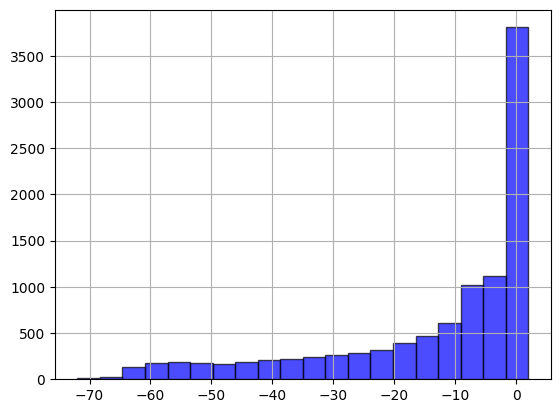

In [45]:
from matplotlib.pyplot import grid, hist, bar, legend, xticks, show

data = [generate_U() for _ in range(10000)]
hist(data, bins=20, edgecolor='black', color='blue', alpha=0.7)

grid()
show()

In [50]:
# P(U < 0)
from numpy import mean, var
samples = [generate_U() for _ in range(10000)]
u_less_then_0 = [u for u in samples if u < 0]
print('P(U<0): ', len(u_less_then_0) / len(samples))
print('Medie: ', mean(samples))
print('Varianta: ', var(samples))

P(U<0):  0.8558
Medie:  -13.912068990978288
Varianta:  323.5253063397048
